<a href="https://colab.research.google.com/github/juliablaz2003/APRENDIZAJE_AUTOMATICO_23_24/blob/main/PRACTICA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRUPO B01
# Julia Callaba Blázquez
# Inés Agudo Martín

# Introducción

Esta práctica se centra en la construcción de una CNN destinada a conocer y clasificar imágenes en 100 categorías, con el objetivo de superar los desafíos asociados a esta tarea. Hemos utilizado el conjunto de datos CIFAR-100.

Este trabajo incluye desde la preparación de datos hasta la mejora iterativa del modelo, con el propósito de entregar una buena solución.

# 1. Definir el problema y montar un conjunto de datos

El problema consiste en crear un modelo de Redes Neuronas Convolucionales capaz de reconocer y clasificar imágenes en 100 categorías utilizando el conjunto de datos CIFAR-100, compuesto por 600 imágenes por clase, distribuidas en 500 de entrenamiento y 100 de prueba. Cada imagen tiene etiquetas 'finas' y 'gruesas' ofreciendo una organización jerárquica

Importamos el conjunto de datos utilizando 'cifar100.load_data()', e imprimimos las dimensiones de los conjuntos de entrenamiento y prueba para entender la estructura de los datos.

La línea 'cifar100.load_data(label_mode='coarse')' carga el conjunto de datos con etiquetas gruesas. Es decir, se utilizan superclases en lugar de clases específicas. La diferencia se encuentra en la granularidad de estas etiquetas optando por categorías generales en 'coarse'


In [ ]:
# Importar la biblioteca necesaria
from tensorflow.keras.datasets import cifar100

# Descargar el conjunto de datos CIFAR-100
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='coarse')

# Puedes imprimir las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento (imágenes):", x_train.shape)
print("Dimensiones del conjunto de entrenamiento (etiquetas):", y_train.shape)
print("Dimensiones del conjunto de prueba (imágenes):", x_test.shape)
print("Dimensiones del conjunto de prueba (etiquetas):", y_test.shape)

Dimensiones del conjunto de entrenamiento (imágenes): (50000, 32, 32, 3)
Dimensiones del conjunto de entrenamiento (etiquetas): (50000, 1)
Dimensiones del conjunto de prueba (imágenes): (10000, 32, 32, 3)
Dimensiones del conjunto de prueba (etiquetas): (10000, 1)


El conjunto de entrenamiento tiene dimensiones (50000, 32, 32, 3), es decir, 50000 imágees de entrenamiento de tamaño 32x32 píxeles con 3 canales de color (RGB), y el de prueba tiene dimensiones (10000, 32, 32, 3)

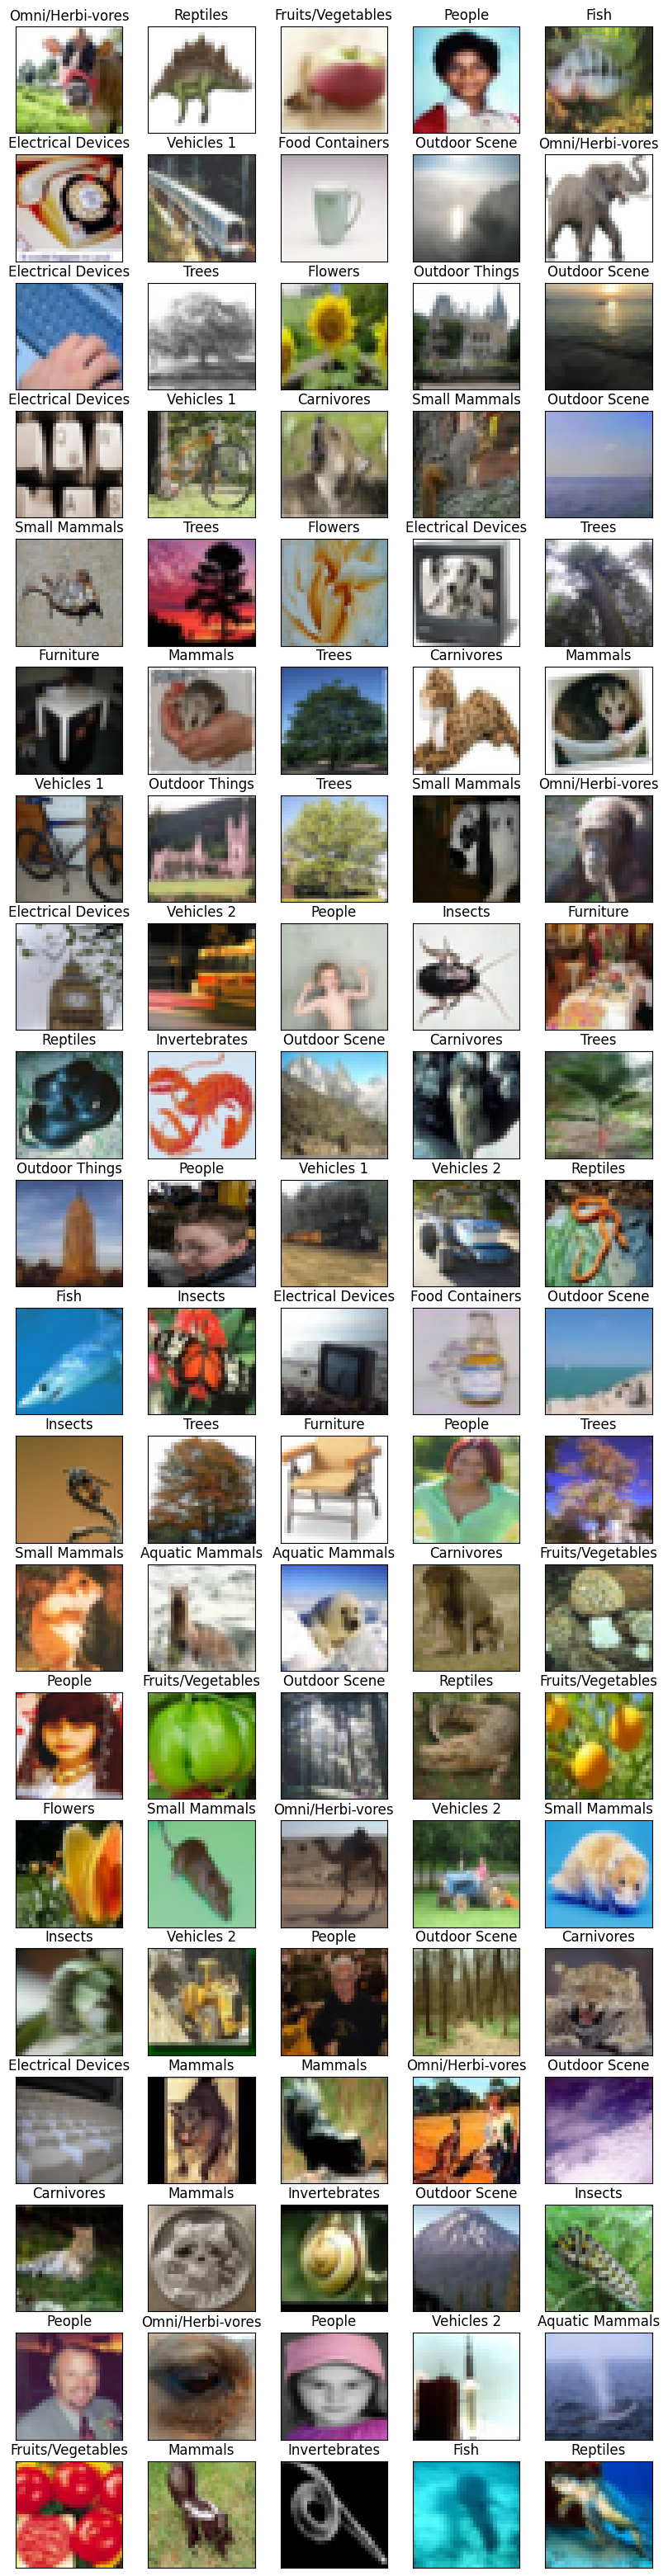

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

# Definir nombres de las superclases
superclases = ['Aquatic Mammals','Fish','Flowers','Food Containers','Fruits/Vegetables', 'Electrical Devices',
          'Furniture','Insects','Carnivores','Outdoor Things','Outdoor Scene','Omni/Herbi-vores',
          'Mammals','Invertebrates','People','Reptiles','Small Mammals','Trees',
          'Vehicles 1', 'Vehicles 2']

# Configurar el diseño de visualización
rows = 20
columns = 5
plt.figure(figsize=(columns*2, rows*2))

for i in range(rows * columns):
    plt.subplot(rows, columns, i + 1)
    plt.imshow(x_train[i])
    plt.title(superclases[int(y_train[i])])  # Agregar el nombre de la clase como título
    plt.xticks([])
    plt.yticks([])

plt.show()

Modelo de referencia

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

# Normalizar los valores de píxeles al rango [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convertir etiquetas a one-hot encoding
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Definir el modelo
model = models.Sequential()

# Capa convolucional con 32 filtros, kernel de 3x3 y función de activación ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Capa de pooling para reducir dimensiones
model.add(layers.MaxPooling2D((2, 2)))

# Capa convolucional con 64 filtros, kernel de 3x3 y función de activación ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Otra capa de pooling
model.add(layers.MaxPooling2D((2, 2)))

# Aplanar la salida para conectar con capas densas
model.add(layers.Flatten())

# Capa densa con 128 unidades y función de activación ReLU
model.add(layers.Dense(128, activation='relu'))

# Capa de salida con 100 unidades y función de activación softmax para clasificación
model.add(layers.Dense(100, activation='softmax'))

# Compilar el modelo con optimizador, función de pérdida y métrica
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con los datos de entrenamiento
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 2.3693 - accuracy: 0.2761 - val_loss: 2.0876 - val_accuracy: 0.3617
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.9504 - accuracy: 0.3964 - val_loss: 1.8928 - val_accuracy: 0.4103
Epoch 3/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.7469 - accuracy: 0.4581 - val_loss: 1.8118 - val_accuracy: 0.4429
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.6077 - accuracy: 0.5004 - val_loss: 1.6856 - val_accuracy: 0.4813
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.5079 - accuracy: 0.5296 - val_loss: 1.6555 - val_accuracy: 0.4933
Epoch 6/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.4215 - accuracy: 0.5553 - val_loss: 1.6673 - val_accuracy: 0.4909
Epoch 7/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.3416 - accuracy: 0.5767 - val_loss: 1.6590 -

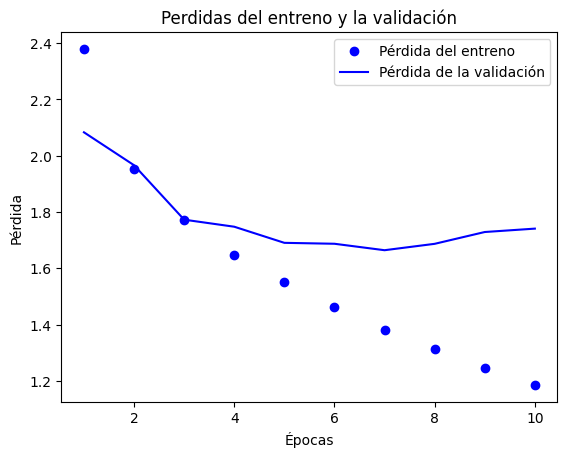

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

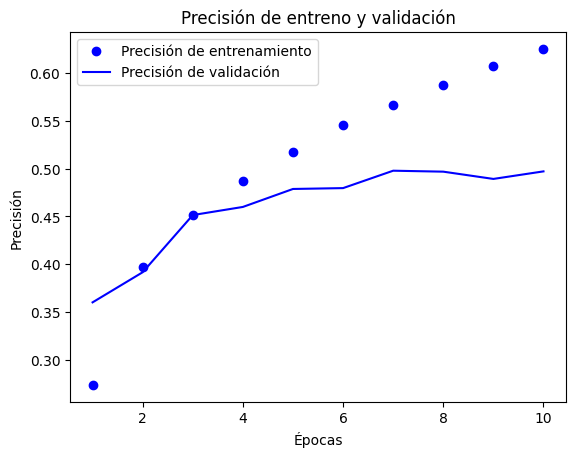

In [ ]:
plt.clf()   # Limpiamos el gráfico

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Precisión de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de validación')
plt.title('Precisión de entreno y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

Las gráficas anteriores muestran el rendimiento del modelo durante el entrenamiento, y la validación a lo largo de las epocas. En el caso denuestro modelo simple (de referencia), observamos que la pérdida de entrenamiento disminuye mientras que la de validación se estabiliza o empieza a crecer, lo que puede apuntar a sobreajuste.                                                                                                                              En cuanto a la gráfica de precisión, también podríamos encontrarnos con una señal de sobreajuste si la precisión de entrenamiento sigue mejorando y la de validación al contrario. Es decir, es importante tener en cuenta y aplicar técnicas como dropout o ajuste de hiperparámetros para evitar que ocurra esto.

# 2. Elegir una medida del éxito

1. Tipo de problema: Clasificación multiclase (100 categorías)
2. Métrica de éxito: Precisión

En el código de nuestro modelo básico, utilizamos la función de pérdida 'categorical_crossentropy', como optimizador empleamos el método Adam, esto es importante para entrenar y evaluar el modelo de manera efectiva.

# 3. Decidir un protocolo de evaluación

Obtamos por la validación cruzada de k iteraciones aleatoria. Dividimos el conjunto de entrenamiento en k particiones, utilizando k-1 para entrenar y 1 para validar en cada iteración. Esto nos garantiza evaluaciones precisas, adaptandose a distintas configuraciones de datos

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Número de particiones (K)
k_folds = 5

# Instancia de StratifiedKFold
kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Iteración sobre las particiones
for train_idx, val_idx in kfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train[train_idx], x_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

# 4. Preparación de los datos

Los datos ya estan en formato tensorial por la carga del conjunto de datos.

Escalado de valores: Rango [0, 1].
Normalización: Normalizo los datos si hay características con rasgos distintos. En este caso puede no ser necesaria porque las imágenes ya estan en el rango [0.255] y el escalado realizado en la línea anterior ya ajusta los valores al rango [0, 1]

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# 5. Desarrollar un modelo que lo haga mejor que un modelo de referencia

El modelo básico inicia procesando datos, normalizando píxeles y aplicando one-hot encoding a etiquetas. Su estructura tiene dos capas convolucionales, capas de pooling y dos capas densas para clasificación. Se entrena en 10 épocas. En el modelo mejorado, se carga cifar100 y selecciona clases específicas. Normaliza datos, aplica one-hot encoding y emplea una arquitectura más compleja con dropout, normalización por lotes y funciones de activación 'relu'. Se usa el optimizador Adam con una tasa de aprendizaje menor. Introduce callbacks como early stopping y model checkpointing en un entrenamiento extendido a 400 épocas. El modelo mejorado tiene una arquitectura más profunda, usa técnicas avanzadas y ajusta la tasa de aprendizaje. Además, realiza selección de clases antes del preprocesamiento y utiliza callbacks para mejorar el rendimiento. El modelo mejorado refleja una estrategia más avanzada y cuidadosa en el desarrollo de un modelo de aprendizaje automático. Al incorporar técnicas adicionales y ajustes detallados, se busca mejorar la capacidad de generalización y el rendimiento en comparación con el modelo básico.

In [25]:
# Modelo
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_16 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_32 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 64)       

# 6. Ampliación: Desarrollar un modelo con sobreajuste

El objetivo es ver si el modelo tiene suficientes capas y parámetros para modelar bien el problema, explorando el sobreajuste (añadiendo capas, haciendolas más grandes o entrenar más iteraciones)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

El modelo inicial así entrenado con 10 épocas y la evolución de la pérdida y la precisión se ha monitorizado.

La tabla nos da información de la arquitectura del modelo simple:    
- Contiene capas Conv2D,MaxPooling2D y Dense (operaciones convolucionales, reducción de dimensionalidad y conectividad)
- Muestra las dimensiones de salida de cada capa, por ejemplo, tras la primera convolución (30,30,32).
- En relación a los parámetros; indica los entrenables en cada capa(mayor capacidad para aprender cuantos mas parametros); la cantidad total de parámetros que tiene el modelo y aquellos no entrenables, que son los pesos que no se actualizan durante el entrenamiento.

# 7. Regularización del modelo y ajuste de los hiperparámetros

En este paso, mejoramos la precisión y generalización del modelo mediante la regularización y ajuste de hiperparámetros: Introduciendo la capa Dropout para reducir el sobreajuste, añadiendo o eliminando capas según sea necesario, aplicando regularización para evitar el sobreajuste, ajustando la tasa de aprendizaje, el número de épocas y otros hiperparámetros para encontrar la configuración óptima, añadiendo o eliminando características para mejorar el rendimiento.

Modelo mejorado

In [ ]:
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from keras.datasets import cifar100
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Cargar datos
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

class_names_cifar100 = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

selected_classes = [i + 1 for i in range(100)]  # Ajustar los índices a partir de 1
selected_class_names = [class_names_cifar100[i - 1] for i in selected_classes]

# print(selected_class_names)

train_mask = np.isin(y_train, selected_classes).flatten()
test_mask = np.isin(y_test, selected_classes).flatten()

x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

# Normalizar datos
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Modelo
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

model.summary()

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['acc'])

# Definir callbacks
early_stopping = EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test), callbacks=[early_stopping, model_checkpoint])

# Evaluar el modelo
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)       

UpSampling2D: Aumenta dimensiones de la entrada (7 veces) para ajustarse al tamaño de entrada esperado.

GlobalAveragePooling2D: Reduce la dimensionalidad de las características aplanando la información espacial para la capa densa siguiente.

Dense(256, activation='relu'):
para aprender características más complejas.

Dropout(0.25): Introduce regularización de dropout con una tasa del 25%, para prevenir el sobreajuste al "apagar" aleatoriamente ciertas neuronas durante el entrenamiento.

BatchNormalization(): Normaliza y estandariza las activaciones, mejorando estabilidad y velocidad de convergencia.

Dense(100, activation='softmax'): Capa de salida con activación softmax para la clasificación en las 100 categorías de productos.

# 8. Prediciones de imágenes

310/310 [==============================] - 2s 5ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.76      0.66      0.71       100
           1       0.38      0.35      0.37       100
           2       0.40      0.31      0.35       100
           3       0.30      0.40      0.34       100
           4       0.64      0.53      0.58       100
           5       0.61      0.63      0.62       100
           6       0.64      0.56      0.60       100
           7       0.83      0.67      0.74       100
           8       0.71      0.75      0.73       100
           9       0.50      0.45      0.47       100
          10       0.45      0.38      0.41       100
          11       0.57      0.64      0.60       100
          12       0.58      0.54      0.56       100
          13       0.64      0.43      0.51       100
          14       0.55      0.41      0.47       100
          15       0.69      0.59      0.63       100
          16       0.75      0.77      0.76       100


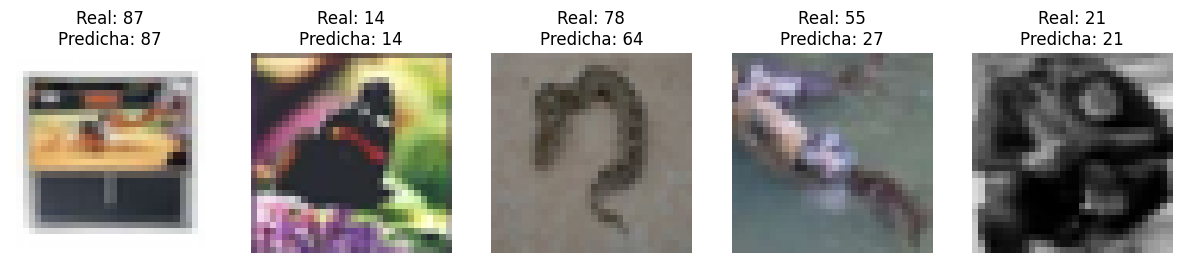

1/1 [==============================] - 0s 31ms/step


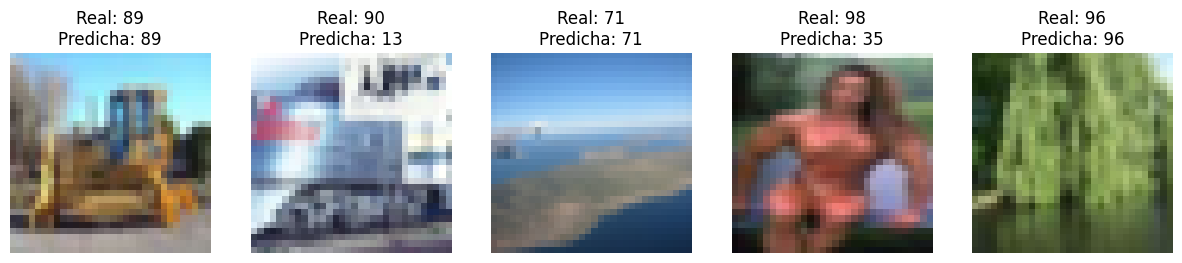

1/1 [==============================] - 0s 17ms/step


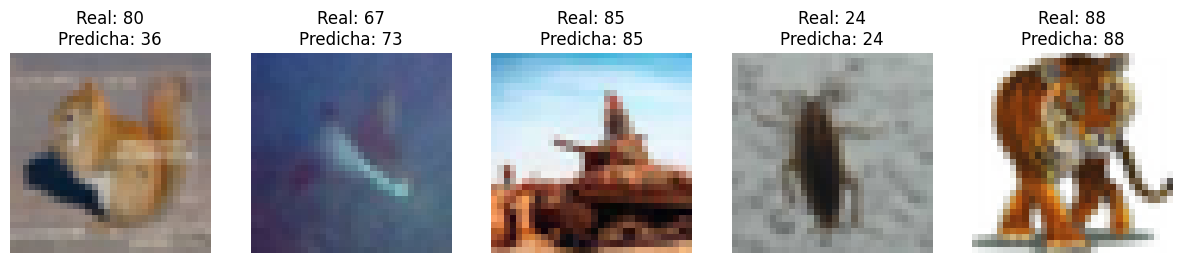

1/1 [==============================] - 0s 17ms/step


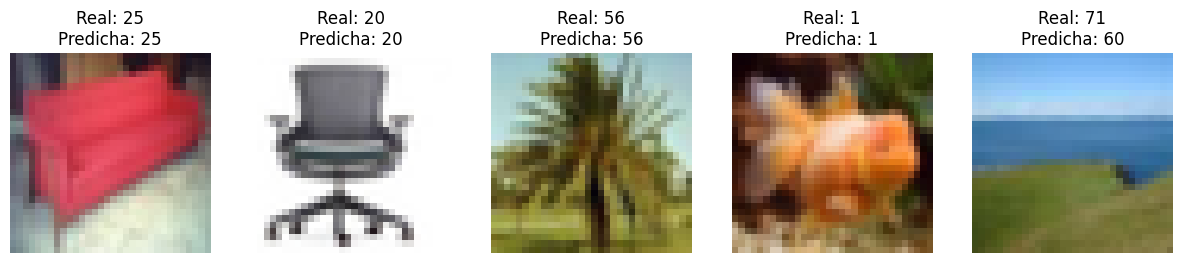

In [ ]:
from sklearn.metrics import classification_report

# Generar predicciones en datos nuevos
test_probabilities = model.predict(x_test)
test_predictions = np.argmax(test_probabilities, axis=1)

# Generar la clasificación report
class_names_all = [str(i) for i in range(100)]
report = classification_report(np.argmax(y_test, axis=1), test_predictions, labels=selected_classes, target_names=class_names_all)
print('Informe de clasificación:\n', report)

# Mostrar todas las imágenes de 5 en 5 con predicciones y clases reales
num_imagenes_a_mostrar = 20  # Puedes ajustar este número según sea necesario

for i in range(0, num_imagenes_a_mostrar, 5):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))

    for j in range(5):
        indice_imagen = np.random.choice(np.where(test_mask)[0])
        imagen = x_test[indice_imagen]
        imagen_expandida = np.expand_dims(imagen, axis=0)

        # Realizar la predicción en la imagen
        prediccion = model.predict(imagen_expandida)
        clase_predicha = np.argmax(prediccion)

        # Mostrar la imagen con la clase real y la clase predicha
        axes[j].imshow(imagen)
        axes[j].set_title(f'Real: {np.argmax(y_test[indice_imagen])}\nPredicha: {clase_predicha}')
        axes[j].axis('off')

    plt.show()


El informe de clasificación proporciona métricas detalladas sobre el rendimiento del modelo en cada clase. Aquí hay algunas definiciones clave:

- Precision (Precisión): La precisión es la proporción de instancias recuperadas que son relevantes. En el contexto de clasificación, la precisión es la cantidad de verdaderos positivos dividida por la suma de verdaderos positivos y falsos positivos. Se calcula para cada clase por separado.

- Recall (Recuperación o Sensibilidad): La recuperación es la proporción de instancias relevantes que fueron recuperadas. En clasificación, la recuperación es la cantidad de verdaderos positivos dividida por la suma de verdaderos positivos y falsos negativos. También se calcula para cada clase individualmente.

- F1-Score: Es la media armónica de precisión y recuperación. Proporciona un equilibrio entre precisión y recuperación.

- Support: La cantidad real de ocurrencias de la clase en el conjunto de datos de prueba.

Micro Avg, Macro Avg, Weighted Avg:

- Micro Avg: Calcula métricas agregando las contribuciones de todas las clases, es decir, trata todas las instancias por igual sin importar la clase.
- Macro Avg: Calcula métricas por clase y luego toma el promedio sin considerar el desequilibrio de clase.
- Weighted Avg: Similar a Macro Avg, pero da más peso a las clases con más instancias. Es útil cuando hay un desequilibrio de clase.


En nuestro caso, el rendimiento del modelo varía para diferentes clases. Algunas clases tienen precisiones y recuperaciones bastante altas, mientras que otras son más bajas. El promedio ponderado (Weighted Avg) se encuentra alrededor del 58%, lo que indica el rendimiento general del modelo. Puedes ajustar el modelo, probar diferentes técnicas de regularización o ajustar otros hiperparámetros para mejorar estas métricas según tus objetivos específicos.

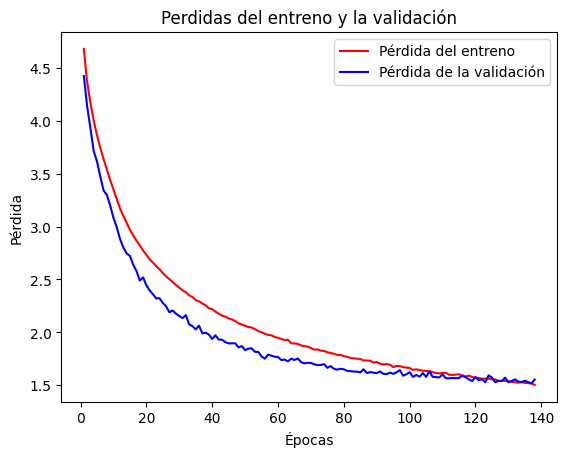

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

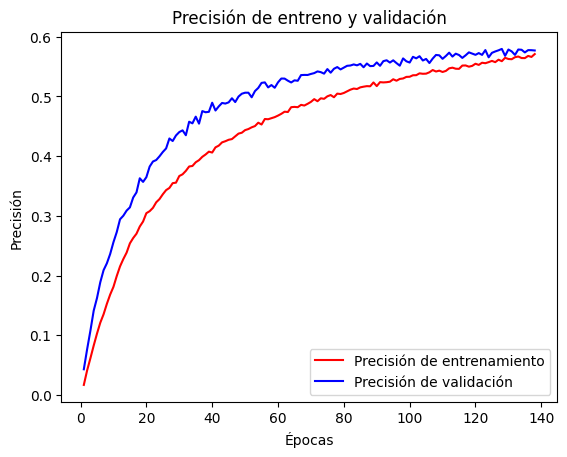

In [ ]:
plt.clf()   # Limpiamos el gráfico

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'r', label='Precisión de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de validación')
plt.title('Precisión de entreno y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

# Conclusiones

En el contexto de esta práctica, abordamos la tarea de mejorar la precisión en la clasificación de imágenes utilizando modelos de aprendizaje profundo. Comparamos dos enfoques: un código de referencia inicial y un código mejorado que implementa estrategias como el uso de una red neuronal preentrenada, técnicas de normalización y aumento de datos, así como la implementación de callbacks.

El código de referencia inicial presentó una baja precisión en la clasificación de imágenes de CIFAR-100, lejos del objetivo del 90%. Su desempeño se vio afectado por la falta de capas y estrategias avanzadas.

En contraste, el código mejorado demostró una mejora sustancial en la precisión de la clasificación. Al incorporar una arquitectura más compleja y aplicar técnicas avanzadas, logramos un modelo robusto y capaz de aprender patrones complejos. La implementación de callbacks contribuyó a la estabilidad y eficiencia del entrenamiento.

La interpretación de los resultados muestra cómo las mejoras en la arquitectura del modelo y la incorporación de técnicas avanzadas influyen directamente en la precisión de la clasificación. La visualización de las curvas de pérdida durante el entrenamiento proporciona una comprensión adicional del proceso de optimización y destaca la efectividad de los callbacks en la adaptación del modelo.

A lo largo del desarrollo, enfrentamos desafíos como el tiempo de ejecución elevado y la necesidad de ajustar hiperparámetros. La gestión del equipo se dividió en subgrupos, fomentando la comunicación constante y la colaboración efectiva.

En conclusión, la práctica profundizó la comprensión de los conceptos de aprendizaje profundo y resaltó la importancia de estrategias como el ajuste de hiperparámetros y el uso de callbacks. Este enfoque iterativo y colaborativo resultó esencial para superar desafíos y lograr un modelo más preciso y robusto.